## Matrix Properties
### Frobenius Norm : It's quite similar to the L2 norm, the only difference being, it is calculated for a matrix instead of a vector. It is the square root of the summation of the squares of the elements present in the matrix.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf

In [37]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [38]:
(1**2 + 2**2 + 3**2 + 4**2)**(1/2)

5.477225575051661

In [39]:
np.linalg.norm(X) # same function as for vector L2 norm

5.477225575051661

In [40]:
X_pt = torch.tensor([[1, 2], [3, 4.]]) # torch.norm() supports floats only

In [41]:
torch.norm(X_pt)

tensor(5.4772)

In [42]:
X_tf = tf.Variable([[1, 2], [3, 4.]]) # tf.norm() also supports floats only

In [43]:
tf.norm(X_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=5.477226>

### Matrix Inversion

#### The inverse of A is A^-1 only when AA^-1 = A^-1A = I.
#### For an equation Ax = B, A = x^-1B.
#### For a  2x2 matrix ([a, b], [c,d]), swap the positions of a and d, put negatives in front of b and c, and divide everything by the determinant (ad-bc).

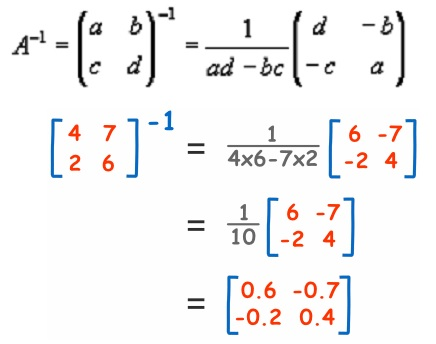
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Image Source: Google                                                                                                                                                                                                                                                                                          

In [44]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [45]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [46]:
np.dot(Xinv, X)

array([[1.00000000e+00, 0.00000000e+00],
       [1.77635684e-15, 1.00000000e+00]])

In [47]:
y = np.array([4, -7])
y

array([ 4, -7])

In [48]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Show that $y = Xw$: 

In [49]:
np.dot(X, w)

array([ 4., -7.])

In [50]:
X_pt = torch.tensor([[4, 2], [-5, -3.]])
X_pt

tensor([[ 4.,  2.],
        [-5., -3.]])

In [51]:
X_pt_inv = torch.inverse(torch.tensor([[4, 2], [-5, -3.]])) # float type
X_pt_inv

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [52]:
torch.matmul(X_pt, X_pt_inv) # like np.dot(), automatically infers dims in order to perform dot product, matvec, or matrix multiplication

tensor([[ 1.0000e+00,  0.0000e+00],
        [-4.7684e-07,  1.0000e+00]])

In [53]:
y_pt = torch.tensor([4, -7.])
y_pt

tensor([ 4., -7.])

In [54]:
w = torch.matmul(X_pt_inv, y_pt)
w

tensor([-1.,  4.])

In [55]:
X_tf = tf.Variable([[4, 2], [-5, -3.]])
X_tf

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 4.,  2.],
       [-5., -3.]], dtype=float32)>

In [56]:
X_tf_inv = tf.linalg.inv(X_tf) # also float
X_tf_inv

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.4999998,  0.9999998],
       [-2.4999995, -1.9999996]], dtype=float32)>

In [57]:
tf.matmul(X_tf, X_tf_inv)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.0000000e+00,  0.0000000e+00],
       [-4.7683716e-07,  1.0000000e+00]], dtype=float32)>

In [58]:
y_tf = tf.Variable([4, -7.])
y_tf

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([ 4., -7.], dtype=float32)>

In [59]:
tf.linalg.matvec(X_tf_inv, y_tf)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.9999995,  3.999999 ], dtype=float32)>

#### Matrix inverse can be calculated only if the matrix is not Singular i.e. all the columns of the matrix are linearly independent.
#### If the matrix is Singular the determinant of the matrix becomes 0, and we can't divide anything by 0, hence matrix can't be calculated.

### Matrix Inversion Where No Solution

In [60]:
X = np.array([[-4, 1], [-8, 2]])
X

array([[-4,  1],
       [-8,  2]])

In [61]:
# Uncommenting the following line results in a "singular matrix" error
# Xinv = np.linalg.inv(X)

### Diagonal Matrices

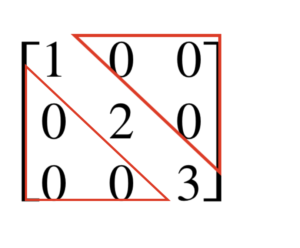
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Image Source: Google
#### Non zero elements along the main diagonal, zeroes everywhere else. Identity matrix is an example of a diagonal matrix.
1) If the diagonal matrix is square diag(x) represents a vector x which contains all the elements of the main diagonal.<br>
2) Diagonal matrices are computationally very efficient. diag(x)y = Dot product of x and y. <br>
3) None of the elements on the main diagonal can be 0. <br>
4) Inverse of diag(x) = $diag[1/x1, 1/x2 ..... 1/xn]^T$

In [62]:
x = np.array([[3, 0], [0, 4]])
x

array([[3, 0],
       [0, 4]])

In [63]:
y = np.array([[5, 6]])
y

array([[5, 6]])

In [64]:
np.diagonal(x)

array([3, 4])

In [65]:
np.dot(np.array([np.diagonal(x)]), y.T)

array([[39]])

In [66]:
Xinv = np.linalg.inv(x)
Xinv

array([[0.33333333, 0.        ],
       [0.        , 0.25      ]])

In [67]:
Xinv2 = np.array([[1/3, 0], [0, 1/4]]).T
Xinv2

array([[0.33333333, 0.        ],
       [0.        , 0.25      ]])

In [68]:
Xinv == Xinv2

array([[ True,  True],
       [ True,  True]])

#### Types of diagonal matrices

#### Upper Triangular Matrix

An upper triangular matrix consists entries below the main diagonal.

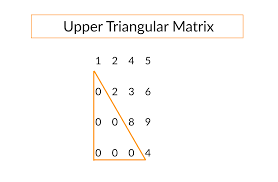
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Image Source: Google

In [70]:
Upper_triangular_matrix = np.array([[1, 2, 3], [0, 4, 5], [0, 0, 6]])
Upper_triangular_matrix

array([[1, 2, 3],
       [0, 4, 5],
       [0, 0, 6]])

#### Lower Triangular Matrix

In an lower diagonal matrix, only the entries above the main diagonal have to be zero.

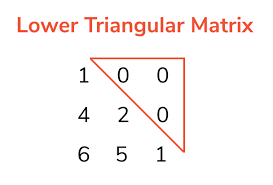
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Image Source: Google

In [71]:
Upper_triangular_matrix = np.array([[1, 0, 0], [2, 3, 0], [4, 5, 6]])
Upper_triangular_matrix

array([[1, 0, 0],
       [2, 3, 0],
       [4, 5, 6]])

####  Use of diagonal and triangular matrices

If the entries below the diagonal are zero, the matrix is in row echelon form. This implies, that the linear system defined by the matrix can easily be solved through substitution. Gauss Jordan elimination is not necessary.

#### Backward Substitution with an Upper Triangular Matrix

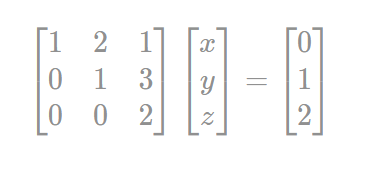

This results in the following equations:
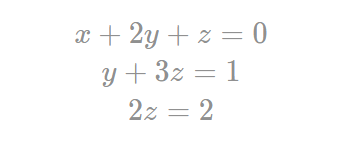

The system can be resolved by a procedure known as backward substitution, where we start with resolving the last equation and substituting the results in the equations above.
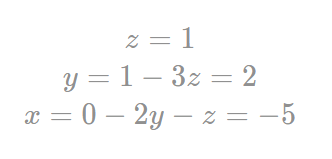


&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Image Source: https://programmathically.com/

#### Forward Substitution with a Lower Triangular Matrix

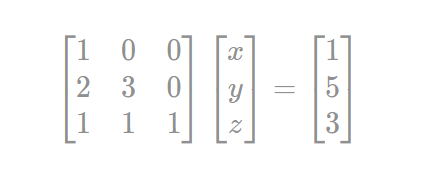

The individual equations look like this:



### Orthogonal Matrices

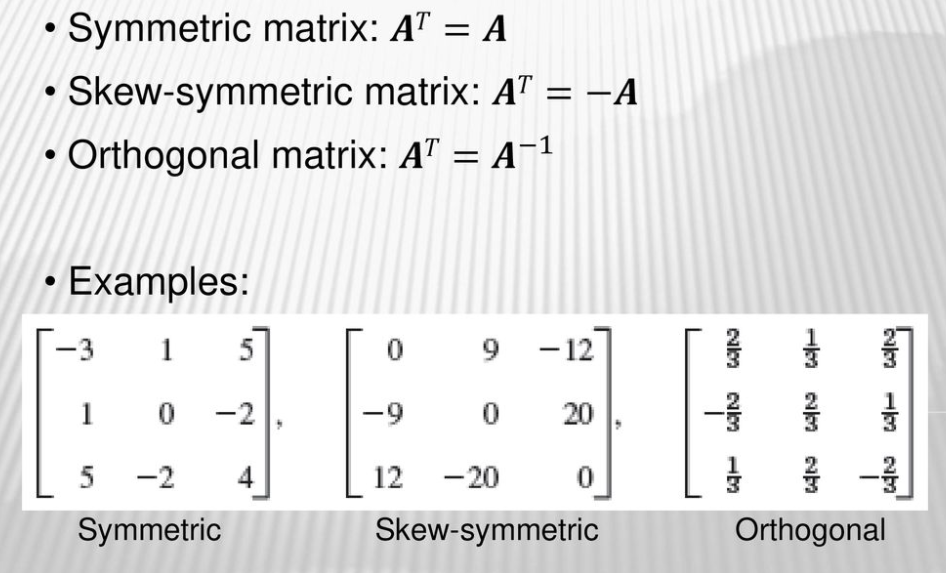
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Image Source: Google
#### In orthogonal matrices, orthonormal vectors (Perpendicular to each other and having L2 norm = 1) make up, all the rows and all the columns <br>
1) For orthogonal matrices, $A * A^T = A^T * A = I$ .<br>
2) $A^T = A$ inverse

In [ ]:
I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

In [ ]:
column_1 = I[:,0]
column_1

In [ ]:
column_2 = I[:,1]
column_2

In [ ]:
column_3 = I[:,2]
column_3

In [ ]:
np.dot(column_1, column_2)

In [ ]:
np.dot(column_1, column_3)

In [ ]:
np.dot(column_2, column_3)

We can use the `np.linalg.norm()` method from earlier in the notebook to demonstrate that each column of $I_3$ has unit norm: 

In [ ]:
np.linalg.norm(column_1)

In [ ]:
np.linalg.norm(column_2)

In [ ]:
np.linalg.norm(column_3)

Since the matrix $I_3$ has mutually orthogonal columns and each column has unit norm, the column vectors of $I_3$ are *orthonormal*. Since $I_3^T = I_3$, this means that the *rows* of $I_3$ must also be orthonormal. 

Since the columns and rows of $I_3$ are orthonormal, $I_3$ is an *orthogonal matrix*.

#### Exercise: Prove [[2/3, 1/3, 2/3], [-2/3, 2/3, 1/3], [1/3, 2/3, -2/3]] is an orthogonal matrix.

In [ ]:
K = torch.tensor([[2/3, 1/3, 2/3], [-2/3, 2/3, 1/3], [1/3, 2/3, -2/3]])
K

In [ ]:
Kcol_1 = K[:,0]
Kcol_1

In [ ]:
Kcol_2 = K[:,1]
Kcol_2

In [ ]:
Kcol_3 = K[:,2]
Kcol_3

In [ ]:
torch.dot(Kcol_1, Kcol_2)

In [ ]:
torch.dot(Kcol_1, Kcol_3)

In [ ]:
torch.dot(Kcol_2, Kcol_3)

We've now determined that the columns of $K$ are orthogonal.

In [ ]:
torch.norm(Kcol_1)

In [ ]:
torch.norm(Kcol_2)

In [ ]:
torch.norm(Kcol_3)

We've now determined that, in addition to being orthogonal, the columns of $K$ have unit norm, therefore they are orthonormal. 

To ensure that $K$ is an orthogonal matrix, we would need to show that not only does it have orthonormal columns but it has orthonormal rows are as well. Since $K^T \neq K$, we can't prove this quite as straightforwardly as we did with $I_3$. 

One approach would be to repeat the steps we used to determine that $K$ has orthogonal columns with all of the matrix's rows (please feel free to do so). Alternatively, we can use an orthogonal matrix-specific equation from the slides, $A^TA = I$, to demonstrate that $K$ is orthogonal in a single line of code: 

In [ ]:
torch.matmul(K.T, K)

Notwithstanding rounding errors that we can safely ignore, this confirms that $K^TK = I$ and therefore $K$ is an orthogonal matrix. 

### The Trace Operator

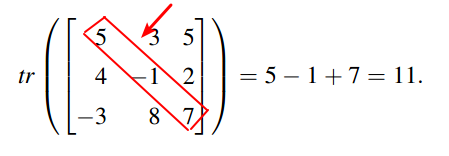

#### Denoted as Tr(A). It is simply the sum of the elements of the main diagonal.

In [ ]:
X = np.array([[3, 15], [5, 20]])
X

In [ ]:
3 + 20

In [ ]:
np.trace(X)

#### Some useful properties of Trace
1) Tr($A$) = Tr($A^T$)<br>
2) For square matrices A, B and C. Tr(ABC) = Tr(BCA) = Tr(CAB)<br>
3) The Frobenius norm of A = $\sqrt {Tr(AA^T)}$

In [ ]:
X = np.array([[1, 2], [3, 4]])
X

In [ ]:
np.trace(X) == np.trace(X.T)

In [ ]:
Y = np.array([[5, 6], [7, 8]])
Y

In [ ]:
Z = np.array([[2, 4], [6, 8]])
Z

In [ ]:
np.trace(np.dot(np.dot(X,Y), Z))

In [ ]:
np.trace(np.dot(np.dot(Z,Y), X))

In [ ]:
np.trace(np.dot(np.dot(Y,X), Z))

In [ ]:
X = np.array([[1, 2], [3, 4]])
X

In [ ]:
np.linalg.norm(X) # same function as for vector L2 norm

In [ ]:
np.trace(np.dot(X, X.T)) ** 0.5

In [ ]:
np.linalg.norm(X)  == np.trace(np.dot(X, X.T)) ** 0.5